In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Data

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=500, n_features=4, random_state=42)

In [4]:
X.shape, y.shape

((500, 4), (500,))

## Split Data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, y_train.shape

((400, 4), (400,))

In [7]:
X_test.shape, y_test.shape

((100, 4), (100,))

## Initialize Parameters

In [8]:
# Add a bias column to the feature matrix
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

def initialize(X):
    theta = np.zeros(X.shape[1])
    return theta

## Sigmoid Function

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
sigmoid(0) 

0.5

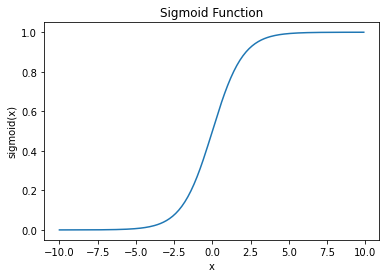

In [10]:
values = np.arange(-10, 10, 0.1)

plt.plot(values, sigmoid(values))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()

## Cost Function

### $ J(\theta) = -{1 \over m} \sum \limits _{i = 1}^{m} {[y_i log(h_\theta(x_i)) + (1 - y_i) log(1 - h_\theta(x_i))]} $
h(x) = sigmoid function 

In [11]:
def get_cost(theta, X, y):
    m = len(y) 
    h = sigmoid(np.dot(X, theta)) 
    cost = -(1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h)) 
    
    return cost

## Gradient Descent

### $ {{\partial J(\theta)} \over {\partial \theta_j}} = {1 \over 2m} \sum \limits _{i = 1}^{m} {(h(x^i) - y)} x_j^i $
#### vectorized form: $ X^T(h_\theta(x) - y) $

In [12]:
def run_gradient_descent(X, y, alpha=0.001, no_iter=2000):
    theta = initialize(X)
    m = len(y)
    
    cost_history = pd.DataFrame(columns=['cost'])
    for i in range(no_iter):
        h = sigmoid(np.dot(X, theta))
        
        dw = (1/m)*(np.dot(X.T, (h - y)))
        theta = theta - alpha*dw
        
        if (i%500 == 0):
            cost_history.loc[i] = get_cost(theta, X, y)

    return theta, cost_history

In [13]:
theta, cost_history = run_gradient_descent(X_train, y_train)

In [14]:
theta

array([-0.02236422,  0.1858965 , -0.06723608,  0.68710542, -0.01797921])

In [15]:
cost_history

,cost
0,0.692849
500,0.575793
1000,0.503006
1500,0.455102


In [16]:
def predict(X, theta):
    x_dot_theta = np.dot(X, theta.T)
    probabilities = sigmoid(x_dot_theta)
    return [1 if p > 0.5 else 0 for p in probabilities]

In [17]:
preds = predict(X_test, theta)

In [18]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 89.0%
